In [ ]:
import requests
from io import BytesIO
from transformers import pipeline
from PIL import Image, ImageDraw

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


import os
os.environ["TRANSFORMERS_NO_TF"] = "1"

## 1. Sentiment Analysis

Sentiment analysis is the task of determining the emotional tone behind a piece of text. It helps identify whether the sentiment expressed is positive, negative, or neutral. This is widely used in analyzing customer feedback, social media monitoring, and understanding public opinion.

In [ ]:
sentiment_analyzer = pipeline('sentiment-analysis')
text = 'That food was not bad!'
result = sentiment_analyzer(text)

print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9994955062866211}]


## 2. Text Summarization

Text summarization is the task of creating a shorter version of a text that still conveys the main points and information of the original document. It is useful for quickly understanding the content of long articles, reports, or documents, and for generating concise previews or summaries.

In [11]:
summarizer = pipeline('summarization')

text = """
Hugging Face is an artificial intelligence company based in New York City and Paris. It is most famous for its Transformers library, a Python library for building, training, and deploying models based on the transformer architecture. The library is widely used for natural language processing tasks such as text classification, sentiment analysis, question answering, and text generation. Hugging Face also provides a platform for hosting and sharing machine learning models, datasets, and demos. The company has become a central hub for the open-source AI community, with a focus on democratizing AI through open models and tools.
"""

summary = summarizer(text, max_length=50, min_length=10, do_sample=False)

print(summary)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'summary_text': ' Hugging Face is an artificial intelligence company based in New York City and Paris . It is most famous for its Transformers library, a Python library for building, training, and deploying models based on the transformer architecture . The company has become a'}]


> The result here is not optimal!

## 3. Question Answering

Question Answering is the task of extracting an answer to a question from a given text (context). The model reads the context and finds the span of text that best answers the question. This is particularly useful for building chatbots, information retrieval systems, and educational tools where users need quick answers from documents.

In [ ]:
question_answerer = pipeline('question-answering')

context = """
Quantum entanglement is a phenomenon in quantum mechanics where the quantum states of two or more particles become linked such that the state of one particle cannot be fully described without considering the other(s), regardless of the distance separating them. When particles are entangled, measurements performed on one particle instantly affect the state of the other, a phenomenon famously referred to as "spooky action at a distance" by Albert Einstein.
Entanglement is generated through interactions such as particle collisions, certain decays, or via specific quantum operations in laboratory settings. One of the most common experimental setups involves creating pairs of photons through a process called spontaneous parametric down-conversion, where a single photon passing through a nonlinear crystal splits into two entangled photons.
The entangled state of particles is mathematically represented by a wavefunction that cannot be factorized into individual particle states. For example, a two-particle spin entangled state might be written as:
Here, if particle 1 is measured and found to be spin-up, particle 2 is immediately known to be spin-down, even if the particles are light-years apart.
Entanglement has crucial applications in modern quantum technologies, including quantum computing, quantum cryptography, and quantum teleportation. It enables protocols such as superdense coding and quantum key distribution, where security relies on the principles of quantum mechanics rather than classical cryptographic algorithms.
Despite its counterintuitive nature, numerous experiments have confirmed the reality of entanglement and violations of Bell's inequalities, ruling out local hidden variable theories and supporting the standard quantum mechanical framework."""

question = "According to the text, what happens to particle 2 when particle 1 in an entangled pair is measured to be spin-up?"

answer = question_answerer(question=question, context=context)

print(answer)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


{'score': 0.6877440810203552, 'start': 1128, 'end': 1161, 'answer': 'immediately known to be spin-down'}


## 4. Named Entity Recognition (NER)

Named Entity Recognition (NER) is the task of identifying and classifying named entities in text into predefined categories such as person names, organizations, locations, dates, etc. It helps in extracting structured information from unstructured text and is fundamental for many downstream NLP tasks like information extraction, question answering, and text summarization.

In [13]:
ner_pipeline = pipeline('ner', grouped_entities=True)

text = "Hugging Face is a company located in New York City and Paris."

entities = ner_pipeline(text)

print(entities)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'entity_group': 'ORG', 'score': np.float32(0.944223), 'word': 'Hugging Face', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': np.float32(0.9990189), 'word': 'New York City', 'start': 37, 'end': 50}, {'entity_group': 'LOC', 'score': np.float32(0.99869424), 'word': 'Paris', 'start': 55, 'end': 60}]


## 5. Text Generation

Text Generation is the task of creating new text based on a given prompt or starting text. The model predicts the next word or sequence of words, allowing for the creation of stories, articles, poems, code, and more. It is a fundamental capability for applications like chatbots, content creation tools, and creative writing assistants.

In [14]:
text_generator = pipeline('text-generation')

prompt = "The quick brown fox jumps over the lazy"

generated_text = text_generator(prompt, max_length=30, num_return_sequences=1)

print(generated_text)

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'The quick brown fox jumps over the lazy, lazy fox, and they all make a full-on racket.\n\n"That\'s a lot of power to have at the same time," he says. "You have to keep the people around you strong and keep them strong. Even in the case of the first two years, the fox will be the best of the best. If you have to show up and defend, you have to show up and defend, and you have to show up and defend. That\'s the way it\'s all going to be."\n\nThe young fox was having a good time. "I think we\'ll be off to a good start," he says.\n\nHe thinks about the new team he would face, and he thinks about the new team that would come along. "I\'m going to look at it as a team and try to figure out how do I have a team that I\'m happy with, that I\'m happy with for the next two years, and when I\'m not happy with it, I\'m not happy with it. I\'m going to be a lot more humble and less arrogant, and I\'ll be able to do that better."\n\nIt\'s been a good year for him and for his tea

> The result here is hard hallucination.

## 6. Image classification

Image Classification is the task of assigning a label or category to an entire image. The model analyzes the visual content of an image and predicts what it represents, choosing from a predefined set of classes. This is a fundamental task in computer vision with applications ranging from organizing photo libraries and content moderation to medical image analysis and autonomous driving.

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


[{'label': 'Egyptian cat', 'score': 0.9374417066574097}, {'label': 'tabby, tabby cat', 'score': 0.03844262287020683}, {'label': 'tiger cat', 'score': 0.014411377720534801}, {'label': 'lynx, catamount', 'score': 0.003274321323260665}, {'label': 'Siamese cat, Siamese', 'score': 0.0006795928347855806}]


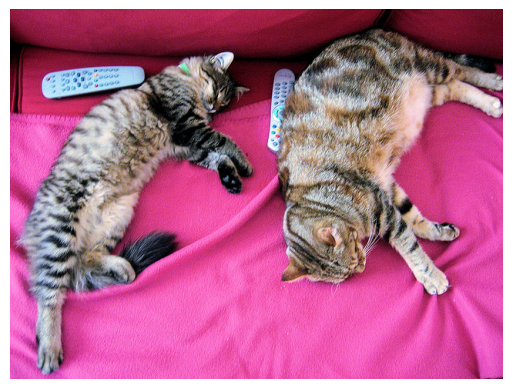

In [15]:
image_classifier = pipeline("image-classification")

image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

classification_results = image_classifier(image)

print(classification_results)

plt.imshow(image)
plt.axis("off")
plt.show()


## 7. Object Detection

Object Detection is a computer vision task that involves identifying and locating instances of predefined objects within an image or video. It not only classifies what objects are present but also provides their precise location using bounding boxes. This is crucial for applications like autonomous driving, surveillance, image search, and robotics.

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 1d5f47b (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a 

[{'score': 0.9982201457023621, 'label': 'remote', 'box': {'xmin': 40, 'ymin': 70, 'xmax': 175, 'ymax': 117}}, {'score': 0.9960021376609802, 'label': 'remote', 'box': {'xmin': 333, 'ymin': 72, 'xmax': 368, 'ymax': 187}}, {'score': 0.9954745173454285, 'label': 'couch', 'box': {'xmin': 0, 'ymin': 1, 'xmax': 639, 'ymax': 473}}, {'score': 0.9988006353378296, 'label': 'cat', 'box': {'xmin': 13, 'ymin': 52, 'xmax': 314, 'ymax': 470}}, {'score': 0.9986783862113953, 'label': 'cat', 'box': {'xmin': 345, 'ymin': 23, 'xmax': 640, 'ymax': 368}}]


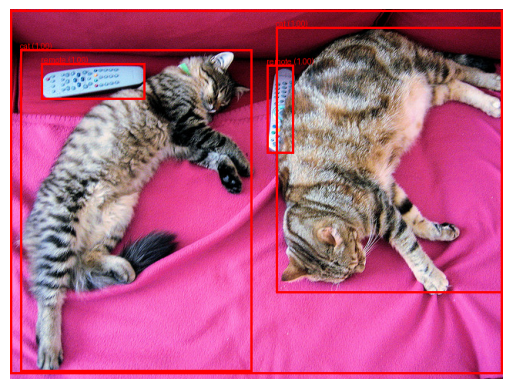

In [16]:
object_detector = pipeline("object-detection")

image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

detection_results = object_detector(image)
print(detection_results)

draw = ImageDraw.Draw(image)
for obj in detection_results:
    box = obj["box"]
    label = obj["label"]
    score = obj["score"]

    # Draw rectangle
    draw.rectangle(
        [(box["xmin"], box["ymin"]), (box["xmax"], box["ymax"])],
        outline="red", width=3
    )
    # Add label + score
    draw.text((box["xmin"], box["ymin"] - 10),
              f"{label} ({score:.2f})", fill="red")


plt.imshow(image)
plt.axis("off")
plt.show()

## 8. Image Segmentation

Image Segmentation is a computer vision task that involves partitioning an image into multiple segments or regions, often to identify and delineate objects or areas of interest at a pixel level. Unlike object detection which draws bounding boxes, segmentation provides a more detailed understanding of the image by outlining the exact shape of objects. It is used in applications like medical imaging, autonomous driving, and image editing.

No model was supplied, defaulted to facebook/detr-resnet-50-panoptic and revision d53b52a (https://huggingface.co/facebook/detr-resnet-50-panoptic).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrFor

[{'score': 0.994097, 'label': 'cat', 'mask': <PIL.Image.Image image mode=L size=640x480 at 0x27A388E7950>}, {'score': 0.998669, 'label': 'remote', 'mask': <PIL.Image.Image image mode=L size=640x480 at 0x27A388E5710>}, {'score': 0.999476, 'label': 'remote', 'mask': <PIL.Image.Image image mode=L size=640x480 at 0x27A388E5310>}, {'score': 0.972207, 'label': 'couch', 'mask': <PIL.Image.Image image mode=L size=640x480 at 0x27A388E5ED0>}, {'score': 0.999424, 'label': 'cat', 'mask': <PIL.Image.Image image mode=L size=640x480 at 0x27A388E6590>}]


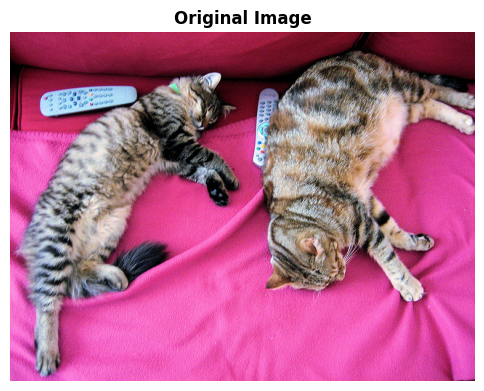

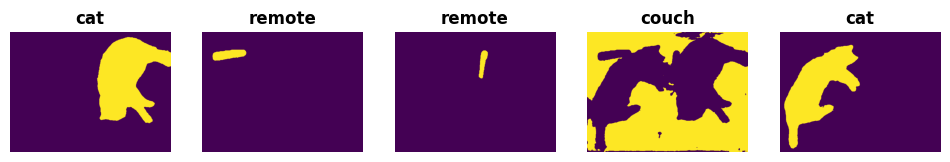

In [20]:
image_segmentor = pipeline("image-segmentation")

image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

segmentation_results = image_segmentor(image)
print(segmentation_results)

plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.show()

plt.figure(figsize=(12, 12))
for i, result in enumerate(segmentation_results):
    mask = result["mask"]  # segmentation mask
    label = result["label"]
    plt.subplot(1, len(segmentation_results), i+1)
    plt.imshow(mask)
    plt.axis("off")
    plt.title(label)

plt.show()

## 9. Translation

Machine Translation is the task of automatically converting text from one language to another. It allows for communication across language barriers and is used in various applications, including real-time translation services, document translation, and localization of software and content.

In [4]:
translator = pipeline('translation', model='Helsinki-NLP/opus-mt-en-fr')

english_text = "Hello, how are you today?"

translated_text = translator(english_text)

print(translated_text)

Device set to use cpu


[{'translation_text': "Bonjour, comment allez-vous aujourd'hui ?"}]


## 10. Zero-Shot Classification

Zero-Shot Classification is a machine learning task where the model is able to classify instances into categories it has not seen during training. Instead of learning to classify based on example data for each category, it uses descriptions or embeddings of the categories. This is particularly powerful when dealing with a large number of potential classes or when new classes emerge frequently, reducing the need for extensive labeled training data for every new category. It relies on the model's ability to generalize from learned concepts to new, unseen ones based on the semantic relationship between the input and the category descriptions.

In [5]:
zero_shot_classifier = pipeline('zero-shot-classification')

sequence_to_classify = "This is a great movie about the future of AI."

candidate_labels = ["politics", "technology", "entertainment", "business"]

classification_results = zero_shot_classifier(
    sequence_to_classify, candidate_labels)

print(classification_results)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Device set to use cpu


{'sequence': 'This is a great movie about the future of AI.', 'labels': ['entertainment', 'technology', 'business', 'politics'], 'scores': [0.7560533285140991, 0.24106720089912415, 0.002040330320596695, 0.0008391976007260382]}


## 11. Image Captioning

Image Captioning is a multimodal task that involves generating a descriptive text caption for an image. It requires a model to understand both the visual content of an image and be able to generate coherent and relevant language. This task bridges the gap between computer vision and natural language processing and has applications in accessibility (describing images for visually impaired users), image indexing and search, and generating descriptions for products or content.

Device set to use cpu


Image-to-text pipeline loaded.
Generated Caption: [{'generated_text': 'a man in a boxing ring is knocked by another man'}]


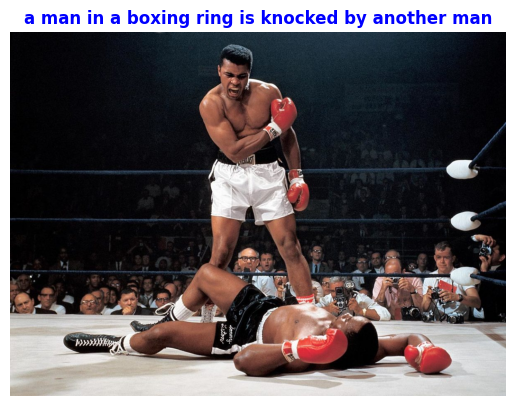

In [14]:
image_captioner = pipeline(
    'image-to-text', model="Salesforce/blip-image-captioning-base")
print("Image-to-text pipeline loaded.")

image_url = "https://www.si.com/.image/t_share/MTY4MTk3MzY5NTUxMjY3NzQx/1965-muhammad-ali-sonny-liston-001292890jpg.jpg"

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

caption_results = image_captioner(image)
print("Generated Caption:", caption_results)

plt.imshow(image)
plt.axis("off")
plt.title(caption_results[0]["generated_text"], fontsize=12, color="blue")
plt.show()

## Project Summary

This notebook provides a hands-on introduction to various natural language processing and computer vision tasks using the Hugging Face `transformers` library. We explored the following pipelines:

-   **Sentiment Analysis:** Classifying text sentiment.
-   **Text Summarization:** Generating concise summaries of text.
-   **Question Answering:** Extracting answers from a given context.
-   **Named Entity Recognition (NER):** Identifying and classifying named entities in text.
-   **Text Generation:** Creating new text based on a prompt.
-   **Image Classification:** Assigning a label to an entire image.
-   **Object Detection:** Identifying and locating objects in an image with bounding boxes.
-   **Image Segmentation:** Partitioning an image into multiple segments to delineate objects.
-   **Translation:** Converting text from one language to another.
-   **Zero-Shot Classification:** Classifying text into categories not seen during training.
-   **Image Captioning:** Generating descriptive text captions for images.